출처: https://www.kaggle.com/c/kobe-bryant-shot-selection/data <br> https://www.kaggle.com/marinovik/kobe-bryant-shot-selection-analysis

In [1]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
import matplotlib.font_manager as fonm
font_list = [font.name for font in fonm.fontManager.ttflist]
for f in font_list:
    print(f"{f}.ttf")

STIXNonUnicode.ttf
STIXSizeOneSym.ttf
STIXSizeOneSym.ttf
cmex10.ttf
STIXSizeTwoSym.ttf
DejaVu Sans Mono.ttf
cmsy10.ttf
DejaVu Serif.ttf
STIXNonUnicode.ttf
DejaVu Serif.ttf
STIXSizeFourSym.ttf
DejaVu Serif.ttf
STIXSizeFourSym.ttf
STIXNonUnicode.ttf
cmtt10.ttf
STIXGeneral.ttf
DejaVu Serif.ttf
DejaVu Sans.ttf
DejaVu Sans.ttf
DejaVu Sans.ttf
STIXGeneral.ttf
STIXNonUnicode.ttf
cmr10.ttf
cmss10.ttf
STIXGeneral.ttf
DejaVu Sans Display.ttf
DejaVu Serif Display.ttf
cmb10.ttf
cmmi10.ttf
DejaVu Sans Mono.ttf
STIXGeneral.ttf
STIXSizeThreeSym.ttf
DejaVu Sans Mono.ttf
STIXSizeFiveSym.ttf
STIXSizeTwoSym.ttf
DejaVu Sans Mono.ttf
DejaVu Sans.ttf
STIXSizeThreeSym.ttf
NanumMyeongjo.ttf
Liberation Mono.ttf
Liberation Mono.ttf
Liberation Mono.ttf
NanumSquare.ttf
NanumMyeongjo.ttf
NanumBarunGothic.ttf
NanumGothic.ttf
Liberation Sans Narrow.ttf
NanumSquareRound.ttf
NanumSquareRound.ttf
Liberation Sans.ttf
Liberation Serif.ttf
Liberation Serif.ttf
Liberation Sans Narrow.ttf
Humor Sans.ttf
Liberation Serif.ttf

In [4]:
# 필요한 모듈 삽입 
import numpy as np 
import pandas as pd 
from matplotlib.lines import Line2D
import seaborn as sns
import missingno as msno

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# kobe 데이터 로드 => kobe 변수에 저장 
kobe = pd.read_csv("/content/drive/MyDrive/KobeBryant/kobe_bryant.csv") 
display(kobe.head(3),kobe.tail(3))

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696
30696,Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,1,1999-00,39,7,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30697


In [7]:
# kobe 데이터셋이 몇개의 행과 열로 구성된 데이터프레임인지 확인 => shape
kobe.shape

(30697, 25)

In [8]:
# kobe의 컬럼명 확인 => columns => 컬럼이 엄청 많은 것을 알 수 있다.
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [9]:
# kobe의 데이터 정보확인 => info
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [10]:
# 결측값 확인하기(1)
kobe.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

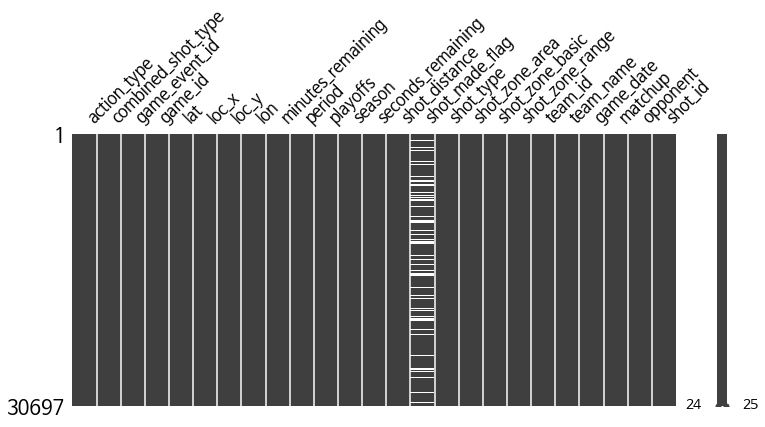

In [11]:
# 결측값 시각화하기 => missingno 사용
msno.matrix(kobe, figsize=(12,5))

---

**필요없는 데이터 제거**

In [12]:
# team_id, team_name => kobe는 오직 한 팀 LA lakers에서 선수생활을 함.
kobe.drop('team_id', axis=1, inplace=True)
kobe.drop('team_name', axis=1, inplace=True)
display(kobe.head(3),kobe.tail(3))

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR,3


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent,shot_id
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,2000-06-19,LAL vs. IND,IND,30696
30696,Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,1,1999-00,39,7,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,2000-06-19,LAL vs. IND,IND,30697


---

In [13]:
# index값을 shot_id로 변경 
kobe.set_index('shot_id', inplace=True)
display(kobe.head(3),kobe.tail(3))

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,,
30695,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-06-19,LAL vs. IND,IND
30696,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,2000-06-19,LAL vs. IND,IND
30697,Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,1,1999-00,39,7,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,2000-06-19,LAL vs. IND,IND


In [14]:
# 명시적으로 category data들의 data type을 category로 변경 => 메모리 절약, 통계 시 이점이 있다.
kobe["action_type"] = kobe["action_type"].astype('object')
kobe["combined_shot_type"] = kobe["combined_shot_type"].astype('category')
kobe["game_event_id"] = kobe["game_event_id"].astype('category')
kobe["game_id"] = kobe["game_id"].astype('category')
kobe["period"] = kobe["period"].astype('object')
kobe["playoffs"] = kobe["playoffs"].astype('category')
kobe["season"] = kobe["season"].astype('category')
kobe["shot_made_flag"] = kobe["shot_made_flag"].astype('category')
kobe["shot_type"] = kobe["shot_type"].astype('category')

In [15]:
# data type 확인
kobe.dtypes

action_type             object
combined_shot_type    category
game_event_id         category
game_id               category
lat                    float64
loc_x                    int64
loc_y                    int64
lon                    float64
minutes_remaining        int64
period                  object
playoffs              category
season                category
seconds_remaining        int64
shot_distance            int64
shot_made_flag        category
shot_type             category
shot_zone_area          object
shot_zone_basic         object
shot_zone_range         object
game_date               object
matchup                 object
opponent                object
dtype: object

In [16]:
# 숫자로 이뤄진 column 데이터의 통계.
kobe.describe(include=['number'])

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000
mean,33.953192,7.110499,91.107535,-118.262690,4.885624,28.365085,13.437437
std,0.087791,110.124578,87.791361,0.110125,3.449897,17.478949,9.374189
min,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000
25%,33.884300,-68.000000,4.000000,-118.337800,2.000000,13.000000,5.000000
50%,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000
75%,34.040300,95.000000,160.000000,-118.174800,8.000000,43.000000,21.000000
max,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000


In [17]:
# data type이 category인 컬럼 데이터의 통계
kobe.describe(include=['object', 'category'])

,action_type,combined_shot_type,game_event_id,game_id,period,playoffs,season,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,25697.0,30697,30697,30697,30697,30697,30697,30697
unique,57,6,620,1559,7,2,20,2.0,2,6,7,5,1559,74,33
top,Jump Shot,Jump Shot,2,21501228,3,0,2005-06,0.0,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,132,50,8296,26198,2318,14232.0,24271,13455,12625,9398,50,1020,1978


---

In [18]:
# 슛 성공 분석하기
kobe_shot_made = kobe['shot_made_flag']
kobe_shot_made

shot_id
1        NaN
2        0.0
3        1.0
4        0.0
5        1.0
        ... 
30693    0.0
30694    NaN
30695    1.0
30696    0.0
30697    0.0
Name: shot_made_flag, Length: 30697, dtype: category
Categories (2, float64): [0.0, 1.0]

In [19]:
# shot_made_flag값이 존재하는 data만 kobe_shot_made 변수에 저장 
kobe_shot_made = kobe.dropna(how='any')
display(kobe_shot_made.head(3),kobe_shot_made.tail(3))

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,,
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,,
30695,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-06-19,LAL vs. IND,IND
30696,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,2000-06-19,LAL vs. IND,IND
30697,Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,1,1999-00,39,7,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,2000-06-19,LAL vs. IND,IND


In [20]:
 # 슛 성공 데이터를 그래프화 하는 함수 작성 => bar_chart
def bar_chart(feature, ax=None):

    # 성공 데이터 => kobe_shot_made['shot_made_flag'] == 1 인 데이터 갯수
    success = kobe_shot_made[kobe_shot_made['shot_made_flag']==1][feature].value_counts()

    # 실패 데이터 =>  kobe_shot_made['shot_made_flag'] == 0 인 데이터 갯수
    fail = kobe_shot_made[kobe_shot_made['shot_made_flag']==0][feature].value_counts()
    
    df = pd.DataFrame([success, fail])
    df.index = ['Success', 'Fail']
    df.plot(kind='bar', stacked=True, ax=ax)

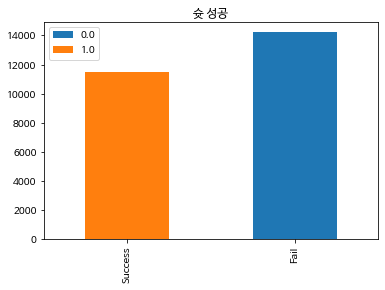

In [21]:
ax = plt.axes()
ax.set_title('슛 성공')
bar_chart('shot_made_flag', ax)
plt.show()

In [22]:
# 슛 성공율 확인  => 성공율 약 44.6% 
print(kobe_shot_made['shot_made_flag'].value_counts() / len(kobe_shot_made.index))

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64


In [23]:
# 시즌별 슛 성공율 확인 => season 데이터와 shot_made_flag만 추출 => 결측값은 제거
season_accuracy = kobe[["season", "shot_made_flag"]].dropna()
season_accuracy.head()

,season,shot_made_flag
shot_id,,
2,2000-01,0.0
3,2000-01,1.0
4,2000-01,0.0
5,2000-01,1.0
6,2000-01,0.0


In [24]:
# 문자형인 shot_made_flag컬럼 숫자형으로 변경
season_accuracy["shot_made_flag"] = pd.to_numeric(season_accuracy["shot_made_flag"])

In [25]:
# 시즌별 평균 구하기 => season으로 정렬하고 shot_made_flag컬럼에는 평균함수(mean)을 적용(agg) => index초기화
season_accuracy_mean = season_accuracy.groupby("season").agg({"shot_made_flag": "mean"}).reset_index()
display(season_accuracy_mean.head(2),season_accuracy_mean.tail(2))

,season,shot_made_flag
0,1996-97,0.422977
1,1997-98,0.430864


,season,shot_made_flag
18,2014-15,0.376054
19,2015-16,0.356223


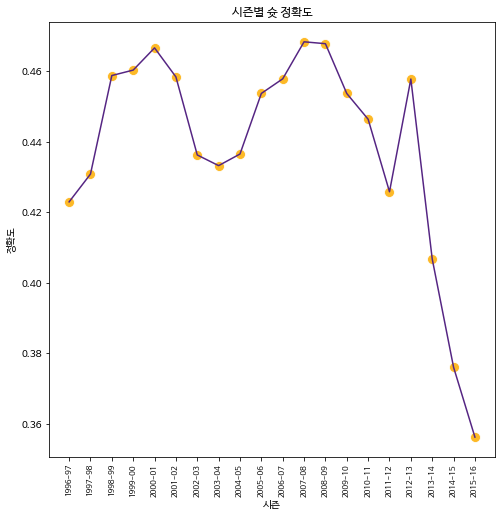

In [26]:
# 시즌별 평균 그래프 그리기 
f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.lineplot(x="season", y="shot_made_flag", data=season_accuracy_mean, color="#552583", ax=ax);
sns.scatterplot(x="season", y="shot_made_flag", data=season_accuracy_mean, s=100, color="#FDB927", ax=ax)
ax.set_title("시즌별 슛 정확도")
ax.set_xlabel("시즌")
ax.set_ylabel("정확도")
plt.xticks(fontsize=8, rotation=90);

---

In [27]:
# 거리별 슛 성공율 확인 => shot_distance 데이터와 shot_made_flag만 추출 => 결측값은 제거
distance_accuracy = kobe[["shot_distance", "shot_made_flag"]].dropna()
distance_accuracy.head()

,shot_distance,shot_made_flag
shot_id,,
2,15,0.0
3,16,1.0
4,22,0.0
5,0,1.0
6,14,0.0


In [28]:
# 문자형인 shot_made_flag컬럼 숫자형으로 변경
distance_accuracy["shot_made_flag"] = pd.to_numeric(distance_accuracy["shot_made_flag"])

In [29]:
# 거리별 평균 구하기 => shot_distance으로 정렬하고 shot_made_flag컬럼에는 평균함수(mean)을 적용(agg) => index초기화
distance_accuracy_mean = distance_accuracy.groupby("shot_distance").agg({"shot_made_flag": "mean"}).reset_index()
display(distance_accuracy_mean.head(2),distance_accuracy_mean.tail(2))

,shot_distance,shot_made_flag
0,0,0.634766
1,1,0.660920


,shot_distance,shot_made_flag
72,77,0.0
73,79,0.0


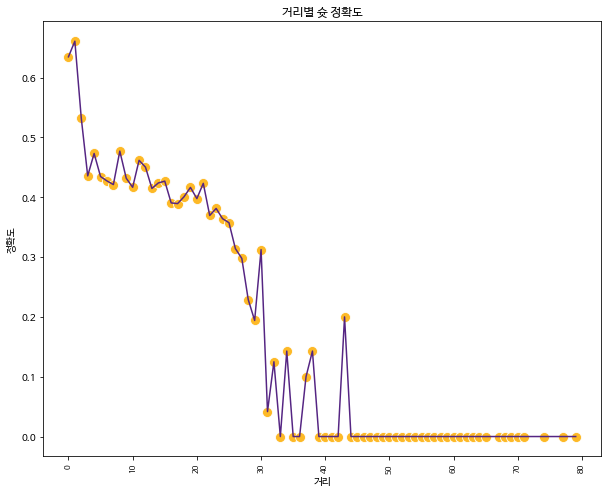

In [30]:
# 거리별 평균 그래프 그리기 
f, ax = plt.subplots(1, 1, figsize=(10,8))
sns.lineplot(x="shot_distance", y="shot_made_flag", data=distance_accuracy_mean, color="#552583", ax=ax);
sns.scatterplot(x="shot_distance", y="shot_made_flag", data=distance_accuracy_mean, s=100, color="#FDB927", ax=ax)
ax.set_title("거리별 슛 정확도")
ax.set_xlabel("거리")
ax.set_ylabel("정확도")
plt.xticks(fontsize=8, rotation=90);

---

In [31]:
# period별 슛 성공율 확인 => period 데이터와 shot_made_flag만 추출 => 결측값은 제거
period_accuracy = kobe[["period", "shot_made_flag"]].dropna()
period_accuracy.head()

,period,shot_made_flag
shot_id,,
2,1,0.0
3,1,1.0
4,1,0.0
5,2,1.0
6,3,0.0


In [32]:
# 문자형인 shot_made_flag컬럼 숫자형으로 변경
period_accuracy["shot_made_flag"] = pd.to_numeric(period_accuracy["shot_made_flag"])

In [33]:
# period별 평균 구하기 => period으로 정렬하고 shot_made_flag컬럼에는 평균함수(mean)을 적용(agg) => index초기화
period_accuracy_mean = period_accuracy.groupby("period").agg({"shot_made_flag": "mean"}).reset_index()
display(period_accuracy_mean.head(2),period_accuracy_mean.tail(2))

,period,shot_made_flag
0,1,0.465672
1,2,0.448802


,period,shot_made_flag
5,6,0.466667
6,7,0.428571


(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text major ticklabel objects>)

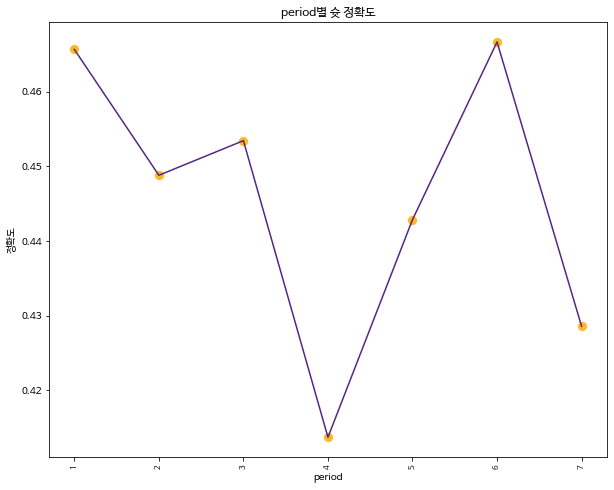

In [34]:
# period별 평균 그래프 그리기 
f, ax = plt.subplots(1, 1, figsize=(10,8))
sns.lineplot(x="period", y="shot_made_flag", data=period_accuracy_mean, color="#552583", ax=ax);
sns.scatterplot(x="period", y="shot_made_flag", data=period_accuracy_mean, s=100, color="#FDB927", ax=ax)
ax.set_title("period별 슛 정확도")
ax.set_xlabel("period")
ax.set_ylabel("정확도")
plt.xticks(fontsize=8, rotation=90)

---

In [35]:
# 상대별 슛 정확도 
opponent_accuracy = kobe[["opponent", "shot_made_flag"]].dropna()
opponent_accuracy.head()

,opponent,shot_made_flag
shot_id,,
2,POR,0.0
3,POR,1.0
4,POR,0.0
5,POR,1.0
6,POR,0.0


In [36]:
# 문자형인 shot_made_flag컬럼 숫자형으로 변경
opponent_accuracy["shot_made_flag"] = pd.to_numeric(opponent_accuracy["shot_made_flag"])

In [37]:
# opponent별 평균 구하기 => opponent으로 정렬하고 shot_made_flag컬럼에는 평균함수(mean)을 적용(agg) => index초기화
opponent_accuracy_mean = opponent_accuracy.groupby("opponent").agg({"shot_made_flag": "mean"}).reset_index()
display(opponent_accuracy_mean.head(2),opponent_accuracy_mean.tail(2))

,opponent,shot_made_flag
0,ATL,0.452055
1,BKN,0.400000


,opponent,shot_made_flag
31,VAN,0.470588
32,WAS,0.427146


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 <a list of 33 Text major ticklabel objects>)

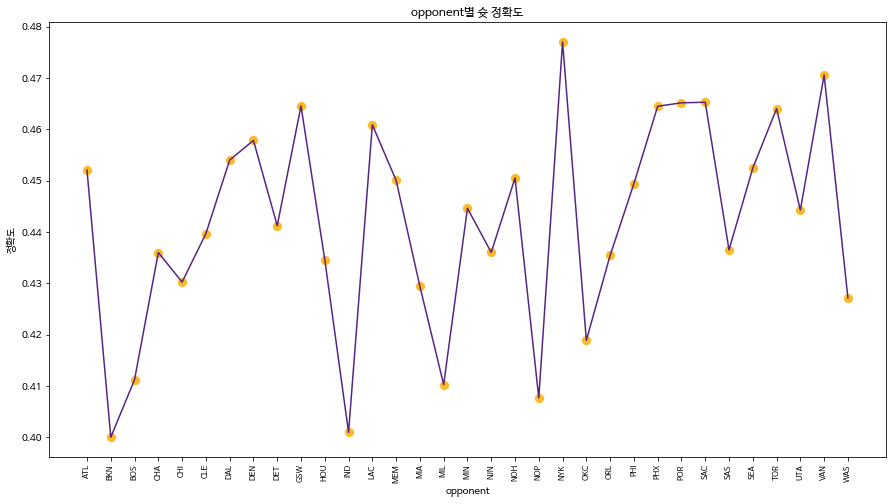

In [38]:
# opponent별 평균 그래프 그리기 
f, ax = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(x="opponent", y="shot_made_flag", data=opponent_accuracy_mean, color="#552583", ax=ax);
sns.scatterplot(x="opponent", y="shot_made_flag", data=opponent_accuracy_mean, s=100, color="#FDB927", ax=ax)
ax.set_title("opponent별 슛 정확도")
ax.set_xlabel("opponent")
ax.set_ylabel("정확도")
plt.xticks(fontsize=8, rotation=90)

---

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


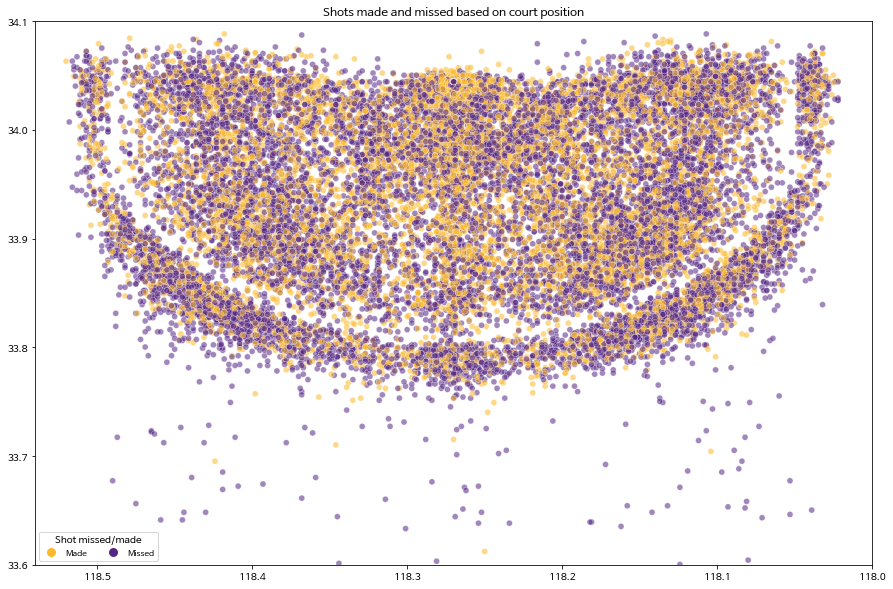

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
scatter = sns.scatterplot(x=kobe["lon"], y=kobe["lat"], hue=kobe['shot_made_flag'],alpha=0.55, ax=ax, palette=("#552583", "#FDB927"))
scatter.set_xlim(left=-118.54, right=-118)
scatter.set_ylim(bottom=33.6, top=34.1)
ax.set_title("Shots made and missed based on court position")
ax.set_xlabel("")
ax.set_ylabel("")
legend_elemnts = [Line2D([0], [0], marker="o", color='w', label="Made",
                         markerfacecolor="#FDB927", markersize=10),
                  Line2D([0], [0], marker="o", color='w', label="Missed",
                         markerfacecolor="#552583", markersize=10)]
plt.legend(handles=legend_elemnts, title="Shot missed/made", 
           ncol=2, fontsize='small', fancybox=True);